# **Kernel Density Estimation**

In [1]:
import pandas as pd
import numpy as np 
import ta as ta

import matplotlib.pyplot as plt
# pip install ipympl
%matplotlib widget

from tools.data_processing import dataprep2

## Data Processing

In [2]:
df = dataprep2('XAUUSD','H1')
data = np.array(df.iloc[-500:]['close'])
data

array([2751.71, 2751.99, 2753.2 , 2752.79, 2752.66, 2745.87, 2751.34,
       2751.96, 2744.73, 2741.46, 2745.91, 2746.63, 2754.05, 2757.71,
       2755.77, 2754.04, 2753.66, 2754.52, 2754.67, 2759.77, 2762.26,
       2774.25, 2772.24, 2772.08, 2775.27, 2773.81, 2772.74, 2774.06,
       2772.72, 2775.72, 2776.71, 2778.67, 2782.37, 2777.35, 2775.82,
       2772.06, 2773.35, 2773.41, 2774.64, 2771.04, 2771.48, 2767.27,
       2769.68, 2762.9 , 2756.14, 2761.08, 2758.12, 2753.27, 2754.52,
       2749.5 , 2757.23, 2763.33, 2768.17, 2771.16, 2761.22, 2757.41,
       2750.79, 2741.87, 2734.42, 2733.58, 2737.02, 2739.35, 2741.59,
       2740.7 , 2741.6 , 2740.6 , 2741.45, 2739.34, 2738.86, 2742.3 ,
       2741.81, 2739.77, 2738.57, 2741.07, 2743.43, 2743.09, 2742.78,
       2745.6 , 2748.71, 2752.87, 2755.44, 2758.7 , 2759.69, 2762.16,
       2764.92, 2764.09, 2763.17, 2762.74, 2763.92, 2763.79, 2764.19,
       2762.8 , 2762.47, 2760.74, 2759.17, 2759.21, 2763.94, 2762.84,
       2758.18, 2758

In [3]:
min = data.min()
max = data.max()

print(min, max)

2733.58 2954.62


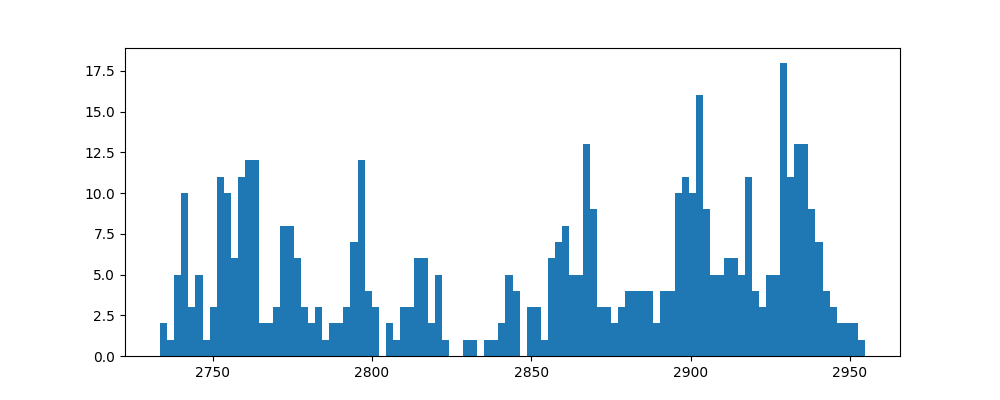

In [4]:
plt.figure(figsize=(10,4))
plt.hist(data, 100)
plt.show()

---
## **FORMULA** 

La estimación de densidad en un punto $x$ se define como:

$$
\hat{f}(x) = \frac{1}{n \, h} \sum_{i=1}^n K\left(\frac{x - x_i}{h}\right)
$$

Donde:

* $n$ = número de datos
* $h$ = parámetro de suavizado (**bandwidth**)
* $K(\cdot)$ = función kernel (usualmente gaussiana)
* $x_i$ = cada punto de la muestra


#### **Función Kernel** más usada: **Kernel Gaussiano**

$$
K(u) = \frac{1}{\sqrt{2\pi}} \exp\!\left(-\frac{u^2}{2}\right)
$$

Un **Kernel** $K(u)$ es una **función simétrica y positiva**, que se usa como **peso** para calcular la densidad alrededor de cada dato.

En KDE, la idea es:

* Colocar una **campana** $K$ en cada dato $x_i$.
* Sumar todas esas campanas.
* Normalizar para que el área total sea 1.

La función **kernel** controla **la forma de la campana**

In [5]:
def K(u):
    return (1 / np.sqrt(np.pi * 2)) * np.exp(-((u**2)/2))

#### **$h$**
La **$h$** en la fórmula de la **KDE** es el **parámetro de suavizado**, también llamado **bandwidth**.
Es **la parte más importante de la técnica**, porque controla **cuánto se “extienden” las campanas gaussianas** que pones en cada dato.

#### Regla de **Silverman** (más común)

$$
h = 1.06 \, s \, n^{-1/5}
$$

* $s$ = desviación estándar de los datos
* $n$ = tamaño de la muestra

Es **rápida** y funciona bien si los datos son **aproximadamente normales**.

### Efecto visual de $h$

| **h pequeño**                           | **h adecuado**               | **h grande**                            |
| --------------------------------------- | ---------------------------- | --------------------------------------- |
| Curva con muchos picos, sigue cada dato | Curva suave pero con detalle | Curva demasiado lisa, pierde estructura |

In [6]:
# Calculo de h por regla de SILVERMAN
n = len(data)
s = data.std()

h = 1.06 * s * n**(-0.2)
print(h)

def silverman(data: np.array):
    n = len(data)
    s = data.std()

    h = 1.06 * s * n**(-0.2)

    return h

print(silverman(data))

20.73657458823994
20.73657458823994


### **KDE**
$$
\hat{f}(x) = \frac{1}{n \, h} \sum_{i=1}^n K\left(\frac{x - x_i}{h}\right)
$$


In [7]:
x_grid = np.linspace(min, max, 200)
density = []
density1 = []

# FORMA VANILLA
for x in x_grid:
    suma =0

    for xi in data:
        u = (x - xi) / h
        ku = K(u)
        
        suma += ku

    f_x = suma / (n*h)
    density.append(f_x)

# VECTORIZADO

for x in x_grid:
    
    u = (x - data) / h

    ku = K(u)
    
    f_x = np.sum(ku) / (n*h)
    density1.append(f_x)


np.allclose(density, density1)  # True si son iguales dentro de un margen

True

### **Vectorizacion**

In [8]:
# Vectorizar aun mas

x_grid = np.array([10, 20])    # shape (2,)
data    = np.array([1, 2, 3])  # shape (3,)

print(f'OG shape: {x_grid.shape}\n{x_grid}\n\nRedimensionado: {x_grid[:,None].shape}\n{x_grid[:,None]}')

OG shape: (2,)
[10 20]

Redimensionado: (2, 1)
[[10]
 [20]]


In [9]:
print(f'OG shape: {data.shape}\n{data}\n\nRedimensionado: {data[None, :].shape}\n{data[None, :]}')

OG shape: (3,)
[1 2 3]

Redimensionado: (1, 3)
[[1 2 3]]


In [10]:
x_grid_rd = x_grid[:,None]
data_rd = data[None, :]

print(x_grid_rd, data_rd)

x_grid_rd - data_rd

[[10]
 [20]] [[1 2 3]]


array([[ 9,  8,  7],
       [19, 18, 17]])

Basicamente lo que esta haciendo numpy al hacer **Broadcasting** es estirar la dimension coincidente de cada 
matriz para a la de la otra matriz  para que tengan las mismas dimensiones y hacer una operacion elemento a elemento:

In [11]:
x_grid = np.array([10, 20])    # shape (2,)
data    = np.array([1, 2, 3])  # shape (3,)

xrd = x_grid[:,None] # shape (2, 1)
datard = data[None,:] # shape (1, 3)

print(xrd)
print('   |\n   v')                                # Aqui estiramos la columna hacia la derecha copiando los valores
print(np.array([[10, 10, 10], [20, 20, 20]]))

print()

print(datard)            
print('   |\n   v')                                # Aqui estiramos la fila hacia abajo copiando los valores
print(np.array([[1, 2, 3], [1, 2, 3]]))

print()
print(f'[10, 10, 10]   [1, 2, 3]   [ 9  8  7]\n[20, 20, 20] - [1, 2, 3] = [19 18 17]]')

# Por tanto cuando tenemos en X_grid todos los valores del linspace para los cuales queremos calcular la densidad
# lo que hacemos es redimensionar ambos vectores para hacr una operacion de broadcasting que da como resultado una matriz
# donde cada fila es el resultado de hacer la operacion para cada valor de la primera matriz con todos los valores
#  de la segunda, por lo que en nuestro caso tendriamos en las filas todas las distancias desde el punto x hasta todos los data.


[[10]
 [20]]
   |
   v
[[10 10 10]
 [20 20 20]]

[[1 2 3]]
   |
   v
[[1 2 3]
 [1 2 3]]

[10, 10, 10]   [1, 2, 3]   [ 9  8  7]
[20, 20, 20] - [1, 2, 3] = [19 18 17]]


In [12]:
x_grid = np.linspace(min, max, 200)
data = np.array(df.iloc[-500:]['close'])

def gaussian_kde(data, x_grid_len):

    h = silverman(data)

    min = data.min()
    max = data.max()

    x_grid = np.linspace(min, max, x_grid_len)

    # Generar matriz de distancias (200 x n)
    U = (x_grid[:, None] - data[None, :]) / h   # Broadcasting

    # Aplicar kernel a toda la matriz
    K_matrix = K(U)

    # Sumar por filas → una densidad por cada x de x_grid
    density_vec = np.sum(K_matrix, axis=1) / (n * h)

    return density_vec

density_vec = gaussian_kde(data, 200)

np.allclose(density, density1, density_vec)

True

## **CLEAN**

In [13]:
def silverman(data: np.array):
    n = len(data)
    s = data.std()

    h = 1.06 * s * n**(-0.2)

    return h

def K(u):
    return (np.exp(-((u**2)/2)) / np.sqrt(np.pi * 2))  

def gaussian_kde(data, x_grid_len):

    h = silverman(data)

    min = data.min()
    max = data.max()

    x_grid = np.linspace(min, max, x_grid_len)

    # Generar matriz de distancias (200 x n)
    U = (x_grid[:, None] - data[None, :]) / h   # Broadcasting

    # Aplicar kernel a toda la matriz
    K_matrix = K(U)

    # Sumar por filas → una densidad por cada x de x_grid
    density_vec = np.sum(K_matrix, axis=1) / (n * h)

    return density_vec

#### Ahora quiero entender y replicar el funcionamiento de la funcion de **KDE** de **SciPy**, que usa pesos.
- Voy a implementar el uso de los pesos, cambian varias cosas:



| Bloque en tu código             | Sin pesos                                                      | Con pesos                                                                                                                                                                                                                        |
| ------------------------------- | -------------------------------------------------------------- | -------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------- |
| **Ancho $h$** (regla Silverman) | $h \;=\; 1.06 \;\,s\;\, n^{-1/5}$                              | $h \;=\; 1.06 \;\,s_w\; n_{\text{eff}}^{-1/5}$<br><br>⋅ $s_w = \sqrt{\dfrac{\sum w_i (x_i-\mu_w)^2}{\sum w_i}}$<br>⋅ $\mu_w = \dfrac{\sum w_i x_i}{\sum w_i}$<br>⋅ $n_{\text{eff}} = \dfrac{\bigl(\sum w_i\bigr)^2}{\sum w_i^2}$ |
| **Numerador**                   | $\displaystyle \sum_{i=1}^{n} K\!\Bigl(\dfrac{x-x_i}{h}\Bigr)$ | $\displaystyle \sum_{i=1}^{n} w_i\,K\!\Bigl(\dfrac{x-x_i}{h}\Bigr)$                                                                                                                                                              |
| **Denominador**                 | $n \, h$                                                       | $\bigl(\sum_i w_i\bigr) \, h$                                                                                                                                                                                                    |

Luego, en tu retorno:

$$
\boxed{\hat f_h(x)\;=\;\dfrac{\sum_i w_i\,K\!\bigl(\tfrac{x-x_i}{h}\bigr)}{\bigl(\sum_i w_i\bigr)\,h}}
$$




**Ancho $h$** (regla Silverman) 

$h \;=\; 1.06 \;\,s_w\; n_{\text{eff}}^{-1/5}$<br><br>⋅ $s_w = \sqrt{\dfrac{\sum w_i (x_i-\mu_w)^2}{\sum w_i}}$<br>⋅ $\mu_w = \dfrac{\sum w_i x_i}{\sum w_i}$<br>⋅ $n_{\text{eff}} = \dfrac{\bigl(\sum w_i\bigr)^2}{\sum w_i^2}$ 

In [14]:
def silverman(data: np.array, weights=None):

    if weights is None:
        n = len(data)
        s = data.std()

    else:
        n = (np.sum(weights)**2) / np.sum(weights**2)
        mu = np.dot(weights, data)/ np.sum(weights)  # Operacion DOT vectores 1D = sum(a * b), sumatorio de mult elemento a elemento
        s =np.sqrt((np.dot(weights,(data-mu)**2))/ np.sum(weights))

    
    h = 1.06 * s * n**(-0.2)

    return h


**Numerador**                   

$\displaystyle \sum_{i=1}^{n} K\!\Bigl(\dfrac{x-x_i}{h}\Bigr)$   ------>    $\displaystyle \sum_{i=1}^{n} w_i\,K\!\Bigl(\dfrac{x-x_i}{h}\Bigr)$

**Denominador**                

$n \, h$ -----> $\bigl(\sum_i w_i\bigr) \,h$                                                                                                                                                                                                    

Luego, en tu retorno:

$$
\boxed{\hat f_h(x)\;=\;\dfrac{\sum_i w_i\,K\!\bigl(\tfrac{x-x_i}{h}\bigr)}{\bigl(\sum_i w_i\bigr)\,h}}
$$


In [15]:
def gaussian_kde(data, x_grid_len, weights=None):

    h = silverman(data, weights)

    min = data.min()
    max = data.max()

    x_grid = np.linspace(min, max, x_grid_len)
        
    # Generar matriz de distancias (200 x n)
    U = (x_grid[:, None] - data[None, :]) / h   # Broadcasting

    # Aplicar kernel a toda la matriz
    K_matrix = K(U)

    # Sumar por filas → una densidad por cada x de x_grid
    density_vec = np.sum(K_matrix, axis=1) / (n * h)


    return density_vec

In [16]:
x_grid = np.linspace(min, max, 200)
data = np.array(df.iloc[-500:]['close'])

kde = gaussian_kde(data, 200)


- Quiero testear como puedo **multiplicar los pesos por la matriz K**, para ello voy a trastear con un par de arrays

In [17]:
A = np.array([[ 1,  2,  3],
              [10, 20, 30]])     # (2×3)

v = np.array([1, 2, 3])      # (3,)

print(A,'\n')
print(v)

[[ 1  2  3]
 [10 20 30]] 

[1 2 3]


In [18]:
print(A,f'{A.shape}\n')
print(v[None,:],f'{v.shape}')

[[ 1  2  3]
 [10 20 30]] (2, 3)

[[1 2 3]] (3,)


In [19]:
A*v

array([[ 1,  4,  9],
       [10, 40, 90]])

In [20]:
print(A*v[None,:])

[[ 1  4  9]
 [10 40 90]]


In [21]:
# Lo que pasa aqui es lo mismo que antes, cuando vamos a realizar una operacion elemento a elemento de matrices con
# diferentes dimensiones (deben coincidir columns primera y filas segunda), en este caso lo que hacemos es hacer una operacion
# de multiplicacion, cada elemento del vector multiplica a uan columan de la matriz

print('A:\n',A,'\n')
print('v:\n',v,'\n')

print(f'A·v:\n{A*v}')
print(f'\nEsto es igual que:\n[ 1  2  3]    [ 1  2  3]\n[ 10 20 30] · [ 1  2  3]')

A:
 [[ 1  2  3]
 [10 20 30]] 

v:
 [1 2 3] 

A·v:
[[ 1  4  9]
 [10 40 90]]

Esto es igual que:
[ 1  2  3]    [ 1  2  3]
[ 10 20 30] · [ 1  2  3]


Entonces:

In [22]:
def build_weights(data_length, first_weight=0.1):
    
    if data_length < 2:
        return np.array([1.0], dtype=float)


    last_weight = 1.0

    step = (last_weight-first_weight)/(data_length-1)

    weights = (step * np.arange(data_length, dtype=float)) + first_weight

    return weights

def silverman(data: np.array, weights=None):
    data = data.astype(float, copy=False)

    if weights is None:
        n = len(data)
        s = data.std(ddof=0)

    else:
        n = (np.sum(weights)**2) / np.sum(weights**2)
        mu = np.dot(weights, data)/ np.sum(weights)  # Operacion DOT vectores 1D = sum(a * b), sumatorio de mult elemento a elemento
        s =np.sqrt((np.dot(weights,(data-mu)**2))/ np.sum(weights))

    
    h = 1.06 * s * n**(-0.2)

    return h

def K(u):
    return (np.exp(-((u**2)/2)) / np.sqrt(np.pi * 2))  


def gaussian_kde(data, x_grid_len, use_weights=False, fw=0.1):

    n = len(data)

    if use_weights is False:
        weights = np.ones(n, dtype=float)
        h = silverman(data, None)

    else:
        weights = build_weights(n, fw)
        h = silverman(data, weights)
        

    x_min = data.min()
    x_max = data.max()

    x_grid = np.linspace(x_min, x_max, x_grid_len)
        
    # Generar matriz de distancias (200 x n)
    U = (x_grid[:, None] - data[None, :]) / h   # Broadcasting

    # Aplicar kernel a toda la matriz
    K_matrix = K(U)

    # Aplicar los pesos a cada columna de la matriz, ya que en cada columna estan las distancias al dato i
    sum_matrix = K_matrix * weights

    # Sumar por filas → una densidad por cada x de x_grid
    density_vec = np.sum(sum_matrix, axis=1) / (np.sum(weights) * h)
    

    return x_grid, density_vec


In [23]:
x_grid_kde, kde = gaussian_kde(data, 200, True, 0.5)
kde

array([0.0018373 , 0.00193197, 0.0020272 , 0.00212265, 0.00221794,
       0.0023127 , 0.00240657, 0.00249915, 0.00259008, 0.00267897,
       0.00276546, 0.0028492 , 0.00292984, 0.00300707, 0.00308059,
       0.00315011, 0.0032154 , 0.00327622, 0.00333241, 0.0033838 ,
       0.00343027, 0.00347174, 0.00350817, 0.00353953, 0.00356586,
       0.0035872 , 0.00360365, 0.00361534, 0.0036224 , 0.00362502,
       0.00362339, 0.00361773, 0.00360828, 0.00359529, 0.00357903,
       0.00355975, 0.00353772, 0.00351323, 0.00348654, 0.00345791,
       0.00342759, 0.00339583, 0.00336285, 0.00332887, 0.00329409,
       0.00325869, 0.00322283, 0.00318666, 0.0031503 , 0.00311387,
       0.00307746, 0.00304115, 0.00300499, 0.00296905, 0.00293337,
       0.00289798, 0.00286291, 0.00282819, 0.00279383, 0.00275986,
       0.0027263 , 0.00269319, 0.00266057, 0.00262847, 0.00259695,
       0.00256608, 0.00253593, 0.0025066 , 0.00247818, 0.00245079,
       0.00242456, 0.00239962, 0.00237614, 0.00235426, 0.00233

## Representacion grafica

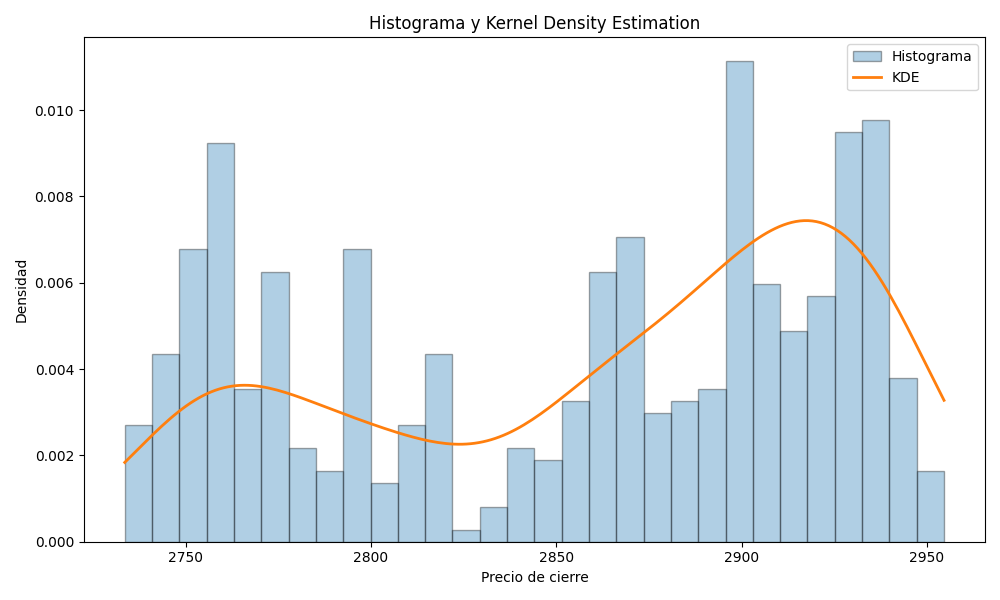

In [24]:
import matplotlib.pyplot as plt

# data           → tus precios de cierre (array 1-D)
# x_grid_kde     → cuadrícula que devolvió gaussian_kde
# kde            → densidad estimada (mismo largo que x_grid_kde)

plt.figure(figsize=(10, 6))

# 1. Histograma “en densidad” (suma de barras = 1)
plt.hist(data,
         bins=30,
         density=True,        # escala vertical comparable con la KDE
         alpha=0.35,          # un poco transparente
         edgecolor='k',
         label='Histograma')

# 2. Curva KDE por encima
plt.plot(x_grid_kde,
         kde,
         linewidth=2,
         label='KDE')

plt.title('Histograma y Kernel Density Estimation')
plt.xlabel('Precio de cierre')
plt.ylabel('Densidad')
plt.legend()
plt.tight_layout()
plt.show()


#### Veo la curva de densidad muy **suave**, nose pega bien a las barras

El “agresivo vs. suave” lo dicta **exclusivamente el bandwidth $h$**.
La regla de Silverman te da un valor “por defecto”; basta con **escalarlo**:

$$
h_{\text{nuevo}} = c \;\times\; h_{\text{Silverman}}
\qquad
\begin{cases}
c < 1 &\rightarrow\ \text{más picos (menos suavizado)}\\
c > 1 &\rightarrow\ \text{más suave}
\end{cases}
$$

#### Escalas típicas

| `bw_scale`  | Comportamiento                         |
| ----------- | -------------------------------------- |
| `0.3 – 0.6` | Destaca picos; riesgo de sobre-ajuste  |
| `1.0`       | Silverman estándar                     |
| `1.5 – 2.0` | Muy suavizado; útil con datos ruidosos |

---




In [25]:
def build_weights(data_length, first_weight=0.1):
    
    if data_length < 2:
        return np.array([1.0], dtype=float)


    last_weight = 1.0

    step = (last_weight-first_weight)/(data_length-1)

    weights = (step * np.arange(data_length, dtype=float)) + first_weight

    return weights

def silverman(data: np.array, weights=None, factor=1.0):
    data = data.astype(float, copy=False)

    if weights is None:
        n = len(data)
        s = data.std(ddof=0)

    else:
        n = (np.sum(weights)**2) / np.sum(weights**2)
        mu = np.dot(weights, data)/ np.sum(weights)  # Operacion DOT vectores 1D = sum(a * b), sumatorio de mult elemento a elemento
        s =np.sqrt((np.dot(weights,(data-mu)**2))/ np.sum(weights))

    
    h = 1.06 * s * n**(-0.2)

    return h * factor

def K(u):
    return (np.exp(-((u**2)/2)) / np.sqrt(np.pi * 2))  


def gaussian_kde(data, x_grid_len=200, use_weights=False, fw=0.2, bw_factor=1.0):

    n = len(data)

    if use_weights is False:
        weights = np.ones(n, dtype=float)
        h = silverman(data, None, bw_factor)

    else:
        weights = build_weights(n, fw)
        h = silverman(data, weights, bw_factor)
        

    x_min = data.min()
    x_max = data.max()

    x_grid = np.linspace(x_min, x_max, x_grid_len)
        
    # Generar matriz de distancias (200 x n)
    U = (x_grid[:, None] - data[None, :]) / h   # Broadcasting

    # Aplicar kernel a toda la matriz
    K_matrix = K(U)

    # Aplicar los pesos a cada columna de la matriz, ya que en cada columna estan las distancias al dato i
    sum_matrix = K_matrix * weights

    # Sumar por filas → una densidad por cada x de x_grid
    density_vec = np.sum(sum_matrix, axis=1) / (np.sum(weights) * h)
    

    return x_grid, density_vec


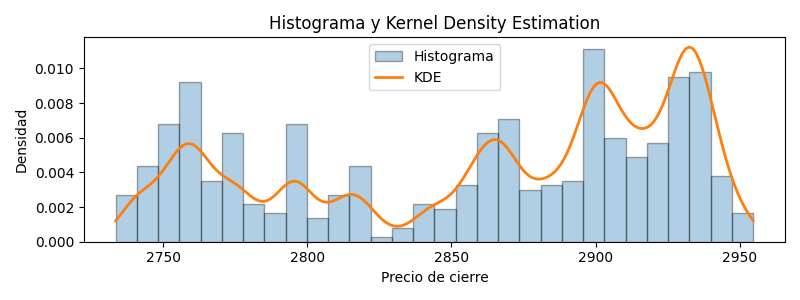

In [26]:
x_grid_kde, kde = gaussian_kde(data, 200, True, 0.5, 0.3)


# data           → tus precios de cierre (array 1-D)
# x_grid_kde     → cuadrícula que devolvió gaussian_kde
# kde            → densidad estimada (mismo largo que x_grid_kde)

plt.figure(figsize=(8, 3))

# 1. Histograma “en densidad” (suma de barras = 1)
plt.hist(data,
         bins=30,
         density=True,        # escala vertical comparable con la KDE
         alpha=0.35,          # un poco transparente
         edgecolor='k',
         label='Histograma')

# 2. Curva KDE por encima
plt.plot(x_grid_kde,
         kde,
         linewidth=2,
         label='KDE')

plt.title('Histograma y Kernel Density Estimation')
plt.xlabel('Precio de cierre')
plt.ylabel('Densidad')
plt.legend()
plt.tight_layout()
plt.show()

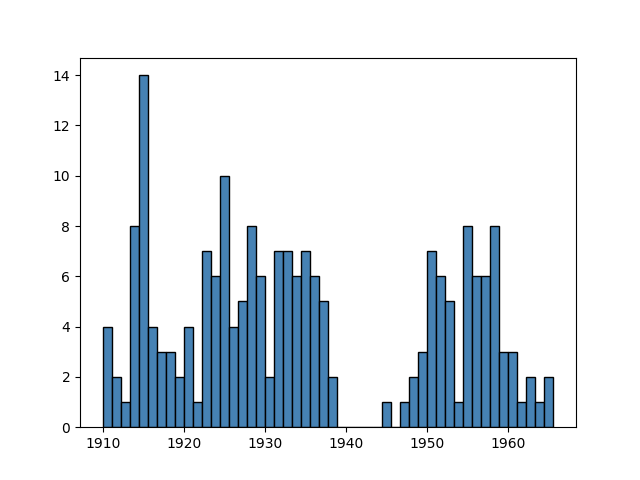

In [27]:
import matplotlib.pyplot as plt
import numpy as np
from matplotlib.animation import FuncAnimation

data = df['close'][-10000:].to_numpy()
win  = 200
bins = 50
pad_frac = 0.05            # 5 % de margen

fig, ax = plt.subplots()
ax.hist(data[:win], bins=bins, color="steelblue", edgecolor="black")

def update(i):
    window = data[i : i + win]

    # --- volver a dibujar histograma ---
    ax.cla()                                  # limpia el eje
    ax.hist(window, bins=bins,
            color="steelblue", edgecolor="black")

    # --- límites X con margen ------------
    w_min, w_max = window.min(), window.max()
    pad = (w_max - w_min) * pad_frac or 1e-9  # evita pad=0 si rango≈0
    ax.set_xlim(w_min - pad, w_max + pad)

    # --- eje Y automático ----------------
    ax.relim()
    ax.autoscale_view()

    ax.set_title(f"Ventana {i}-{i+win-1}  "
                 f"(min={w_min:.2f}, max={w_max:.2f})")

# frames_total = len(data) - win + 1
# ani = FuncAnimation(fig, update,
#                     frames=frames_total,
#                     interval=200,
#                     repeat=False)

# plt.show()


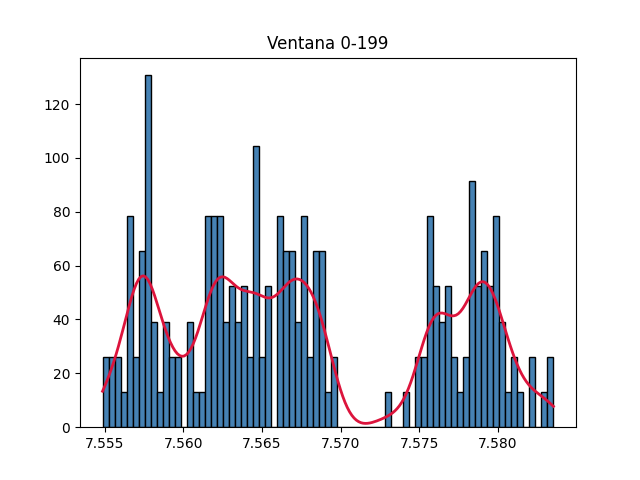

In [28]:
# ---------- parámetros del gráfico ------------------------------
data = df['close'][-10000:].to_numpy()      # tu serie completa
data = np.log(data)
win  = 200                         # tamaño de la ventana
bins = 75                      # n.º de barras
pad_frac = 0.05                    # 5 % de márgen lateral
frames_total = len(data) - win + 1
bw = 0.3

# ---------- figura inicial --------------------------------------
fig, ax = plt.subplots()
window0 = data[:win]
counts, bin_edges, patches = ax.hist(window0, bins=bins, density=True,
                                     color="steelblue", edgecolor="black")
x_kde, y_kde = gaussian_kde(window0, bw_factor=bw)
kde_line, = ax.plot(x_kde, y_kde, color="crimson", lw=2)

w_min, w_max = window0.min(), window0.max()
pad = (w_max - w_min) * pad_frac
ax.set_xlim(w_min - pad, w_max + pad)
ax.set_title(f"Ventana 0-{win-1}")

# ---------- función por frame -----------------------------------
def update(i):
    window = data[i : i + win]

    # --- histograma actualizado ---
    ax.cla()                                   # limpia todo
    ax.hist(window, bins=bins, density=True,
            color="steelblue", edgecolor="black")

    # --- KDE sobre la ventana ---
    x_kde, y_kde = gaussian_kde(window, bw_factor=bw)
    ax.plot(x_kde, y_kde, color="crimson", lw=2)

    # --- márgenes eje X ----------
    w_min, w_max = window.min(), window.max()
    pad = (w_max - w_min) * pad_frac or 1e-9   # evita pad=0
    ax.set_xlim(w_min - pad, w_max + pad)

    # --- título -------------------
    ax.set_title(f"Ventana {i}-{i+win-1}  "
                 f"(min={w_min:.2f}, max={w_max:.2f})")

# ---------- animación -------------------------------------------
# ani = FuncAnimation(fig, update,
#                     frames=frames_total,
#                     interval=100,
#                     repeat=False)

# plt.show()

/tmp/ipykernel_16070/2478782739.py:147: UserWarning: This figure includes Axes that are not compatible with tight_layout, so results might be incorrect.
  plt.tight_layout()


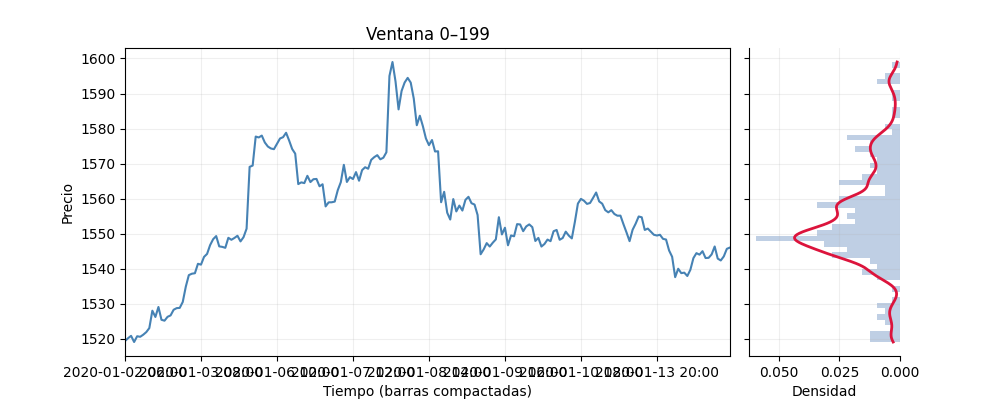

In [32]:
import matplotlib.pyplot as plt
from matplotlib.animation import FuncAnimation
from matplotlib.ticker import FuncFormatter, MaxNLocator
import numpy as np
import pandas as pd

# ----------------- Parámetros -----------------
win        = 200
step       = 1
bins_prof  = 50
interval   = 120
pad_frac_y = 0.05
pad_frac_x = 0.05

# ----------------- Datos ----------------------
df = df[df.index > '2020']
prices = df['close'].to_numpy(dtype=float)
times  = df.index.to_numpy()                  # datetimes reales (para etiquetar)
pos    = np.arange(len(times), dtype=float)   # eje X compactado: 0..N-1
frames_tot = len(prices) - win + 1

# ----------------- Formateador eje X (mapea índice->fecha) ----------------
def fmt_x(x, _):
    i = int(round(x))
    if 0 <= i < len(times):
        return pd.to_datetime(times[i]).strftime('%Y-%m-%d %H:%M')
    return ""

# ----------------- Figura/Axes ----------------
fig, (ax_main, ax_prof) = plt.subplots(
    ncols=2, figsize=(10, 4),
    gridspec_kw={'width_ratios': [4, 1], 'wspace': 0.05},
    sharey=True
)

# Primera ventana
x0 = pos[:win]   # <<< usamos posiciones compactas
y0 = prices[:win]

# Línea de precios (izquierda)
line, = ax_main.plot(x0, y0, lw=1.5, color='steelblue')
ax_main.set_xlabel("Tiempo (barras compactadas)")
ax_main.set_ylabel("Precio")
ax_main.grid(alpha=0.2)
ax_main.xaxis.set_major_formatter(FuncFormatter(fmt_x))
ax_main.xaxis.set_major_locator(MaxNLocator(nbins=8))  # ~8 ticks legibles

# Profile inicial (derecha, mirando a la izquierda)
counts, bin_edges, _ = ax_prof.hist(
    y0, bins=bins_prof, orientation='horizontal', density=True,
    color='lightsteelblue', edgecolor='none', alpha=0.8
)

# Tu función externa de KDE (la asumo definida en tu entorno)
x_kde, y_kde = gaussian_kde(y0, x_grid_len=400, use_weights=True, fw=0.3, bw_factor=0.4)
ax_prof.plot(y_kde, x_kde, color='crimson', lw=2)
ax_prof.invert_xaxis()

# Límites iniciales
def set_limits_for_window(y, counts, y_kde, x_start, x_end):
    ymin, ymax = float(np.min(y)), float(np.max(y))
    ypad = (ymax - ymin) * pad_frac_y or 1e-9
    ax_main.set_ylim(ymin - ypad, ymax + ypad)
    ax_prof.set_ylim(ymin - ypad, ymax + ypad)

    prof_max = float(np.maximum(
        y_kde.max() if np.size(y_kde) else 0.0,
        counts.max() if np.size(counts) else 0.0
    ))
    prof_max = float(np.maximum(prof_max, 1e-9))
    xpad = prof_max * pad_frac_x
    ax_prof.set_xlim(prof_max + xpad, 0)

    # Limites X en unidades compactas (índices)
    ax_main.set_xlim(x_start, x_end)

set_limits_for_window(y0, counts, y_kde, x0[0], x0[-1])

# Estética profile
ax_prof.set_xlabel("Densidad")
ax_prof.grid(alpha=0.2)
ax_prof.spines['right'].set_visible(False)
ax_prof.spines['top'].set_visible(False)

ax_main.set_title(f"Ventana 0–{win-1}")

# ----------------- Update por frame ----------------
def update(i):
    start = i * step
    end   = start + win

    x = pos[start:end]      # <<< posiciones compactas
    y = prices[start:end]

    # Actualizar línea y eje X del principal
    line.set_data(x, y)
    ax_main.set_xlim(x[0], x[-1])

    # Redibujar profile
    ax_prof.cla()
    counts, bin_edges, _ = ax_prof.hist(
        y, bins=bins_prof, orientation='horizontal', density=True,
        color='lightsteelblue', edgecolor='none', alpha=0.8
    )
    x_kde, y_kde = gaussian_kde(y, x_grid_len=200, use_weights=False, fw=0.2, bw_factor=0.3)
    ax_prof.plot(y_kde, x_kde, color='crimson', lw=2)
    ax_prof.invert_xaxis()
    ax_prof.set_xlabel("Densidad")
    ax_prof.grid(alpha=0.2)
    ax_prof.spines['right'].set_visible(False)
    ax_prof.spines['top'].set_visible(False)

    # Ajustar límites sincronizados
    ymin, ymax = float(np.min(y)), float(np.max(y))
    ypad = (ymax - ymin) * pad_frac_y or 1e-9
    ax_main.set_ylim(ymin - ypad, ymax + ypad)
    ax_prof.set_ylim(ymin - ypad, ymax + ypad)

    prof_max = float(np.maximum(
        y_kde.max() if np.size(y_kde) else 0.0,
        counts.max() if np.size(counts) else 0.0
    ))
    prof_max = float(np.maximum(prof_max, 1e-9))
    xpad = prof_max * pad_frac_x
    ax_prof.set_xlim(prof_max + xpad, 0)

    # Título con las fechas reales (usamos times[start] y times[end-1])
    ax_main.set_title(
        f"Ventana {start}–{end-1} "
        f"({pd.to_datetime(times[start]).strftime('%Y-%m-%d %H:%M')} → "
        f"{pd.to_datetime(times[end-1]).strftime('%Y-%m-%d %H:%M')})"
    )

    # mantener formateador/locator (por si algún backend los resetea)
    ax_main.xaxis.set_major_formatter(FuncFormatter(fmt_x))
    ax_main.xaxis.set_major_locator(MaxNLocator(nbins=8))

    return line,

# ----------------- Animación -----------------------
ani = FuncAnimation(fig, update,
                    frames=frames_tot // step,
                    interval=interval,
                    blit=False,
                    repeat=False)

plt.tight_layout()
plt.show()
